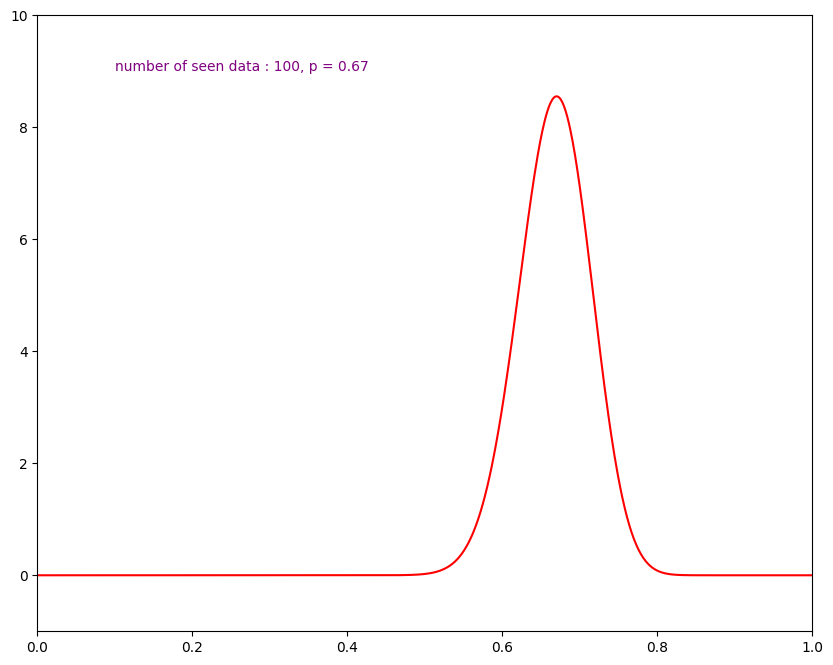

<Figure size 1000x800 with 0 Axes>

In [1]:
## you need these imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display

t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)
#mine
df = pd.read_csv('./digits.csv')
df.drop([200 , 201] , axis=0 , inplace=True)
label = pd.DataFrame(df['label'])
df[df < 128] = 0
df[df >= 128] = 1
df['label'] = label
#endmine
def update(fy: np.array, n:bool) -> np.array:
    p = np.linspace(0,1,t)
    pny = stats.bernoulli.pmf(n , p)
    integral = np.sum(fy*pny)/t
    post = fy*pny/integral
    return post

plt.figure(figsize=(10,8))
for i in range(100):
    n =  df[df['label'] == 8].iloc[i, df.columns.get_loc('pixel404')]
    fy = update(fy, n)
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)